In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("emails.csv")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [7]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [8]:
# Clean column names (handle spacing issues)
df.columns = df.columns.str.strip()

In [9]:
# Check dataset structure
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [10]:
# Rename columns if needed (Adjust based on dataset format)
df = df.rename(columns={"v1": "label", "v2": "text"})  # Assuming these column names exist

In [11]:
# Keep only relevant columns
df = df[["text", "label"]]


In [12]:
# Convert labels to binary (ham = 0, spam = 1)
df["label"] = df["label"].map({"ham": 0, "spam": 1})


In [13]:
# Text preprocessing using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words("english"))
X_tfidf = vectorizer.fit_transform(df["text"])
y = df["label"]

In [14]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [15]:
# Train a Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [16]:
# Make predictions
y_pred = nb_model.predict(X_test)


In [17]:
import matplotlib.pyplot as plt

In [18]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.9722
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[965   0]
 [ 31 119]]


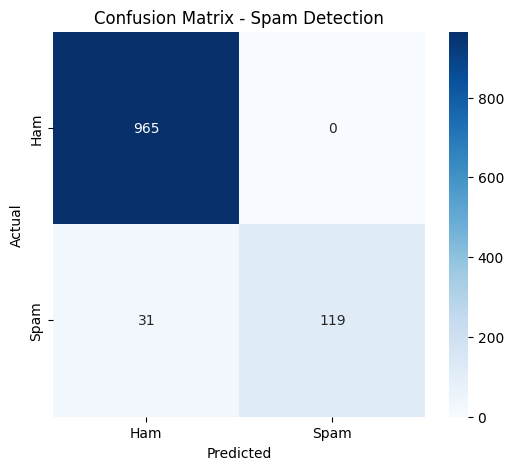

In [19]:
# Visualizing the Confusion Matrix using Matplotlib and Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Spam Detection")
plt.show()

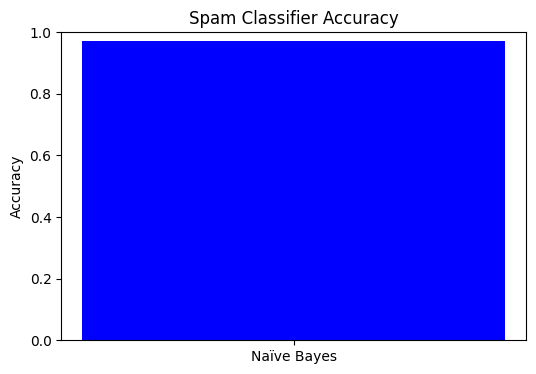

In [20]:
# Plot Accuracy Comparison
plt.figure(figsize=(6, 4))
plt.bar(["Naïve Bayes"], [accuracy], color="blue")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Spam Classifier Accuracy")
plt.show()

In [21]:
# Save the trained model and vectorizer
with open("spam_classifier.pkl", "wb") as model_file:
    pickle.dump(nb_model, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
